Navn på gruppemedlemmer: David Omanovic, Isak Ånonli, Sebastian Siljuholtet Johansen

# TMA4320 spring 2023 - project in technical physics

## Vapor pressure for $H_2 O$

### Introduction
We will investigate the vapor pressure curve $p(T)$ for water in this project. At a given temperature T, the vapor pressure curve describes the (vapor) pressure at which the two phases gas and liquid can exist in thermodynamic equilibrium at the same time. For a quantitative analysis we cannot use the ideal gas law and have to resort to more qualitative methods like the Van der Waals equation. The Van der Waals equation is an extension of the ideal gas law, taking into account more intricate details one would expect it to be more accurate. Despite its great improvement from its predecessor, it sadly carries inaccuracies which will be greatly discussed in detail.

The limitations and deviations can be attributed through that the equation assumes that Van der Waals forces act between all pairs of particles with equal strength, which is not always the case in reality. It also does not consider other types of intermolecular forces that may be present. We will also show inaccuracies at high pressures. It tends to be less accurate at high pressures, where the attractive forces between particles become more significant and can no longer be described by a simple additive term. Further on we find out that there is also temperature dependence. The equation does not account for the temperature dependence of Van der Waals forces, which may cause deviations at extremely low or high temperatures. To be able to fix this, we will dive into interpolation and working with experimental data to try and fit our theories as good as possible and get a better physical understanding of the problem at hand. First off, we are interested in implementing and working with the van Der Waals equation in its basis, and then expand on this.

# Task 1a)
We want to find the constants a and b first in Van der Waals equation of state in terms of the temperature and pressure for the critical points in the coexistence curves $T_c$ and $p_c$. The constant are found by

$$
V_c = 3b, p_c = \frac{a}{27b^2},  T_c = \frac{8a}{27Rb} \\ 
$$

$$
a = 3 p_cv_c^2=\frac98 R T_c v_c = \frac{27}{64} \frac{R^2T_c^2}{p_c} \\
$$

$$
b = \frac{v_c}{3}=\frac{RT_c}{8p_c}
$$

Using $p_c$ and $v_c$ from [1], we obtain the constants with respective SI units accordingly

$p_c = 22.064$ mPa, and $T_c = 647.096 K $, ($373.946 ^\circ C$)

$a = \frac{27}{64} \cdot \frac{(8.314J/Kmol)^2\cdot(647.096 K)^2}{22063518.8 Pa} = 0.5536 \frac{J^2}{mol^2 \cdot Pa} = 5.536 \frac{L^2bar}{mol^2}$

$b = \frac18 \frac {RT_c}{p_c} = 3.049 \cdot 10^{-5} \frac{J}{mol\cdot Pa} = 0.03049 \frac{L}{mol} $

From the corresponding value for b, we can retrieve the critical molar volume
$V_c = 3b = 3 \cdot 0.03049$ L/mol $= 91.47$ mL/mol. 

Comparing this to experimental value for critical volume is $V_c = 55.948$ mL/mol, we see that van der Waals critical volume is critically larger than the experimental value. In other words, van der Waals is not as exact as we may think, but it has a considerable improvement from the infamous ideal gas law.

The difference between the critical volume calculated using the van der Waals equation and the experimental value for water can be attributed to the unique structure and properties of water that the van der Waals equation does not adequately account for. Some important factors that contribute to this disparity are for instance the hydrogen bonding, molecular geometry, temperature dependancy and water's anomalous high pressure behavior.

In [1]:
# Importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import math
import sympy as sy
import scipy 
from scipy import optimize
from scipy import interpolate

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 16})

In [2]:
"""
Definition of parameters that are defined
only once. Held constant throughout all tasks.
"""

n = 1 # [moles] moles of substance
R = 8.314 # [J/(K * Mol)], Universal gas constant
T_c = 647.096 # [K], critical temperature
p_c = 22.064e6 # [Pa], critical pressure
a = (27* R**2 * T_c**2) / (64 * p_c)# [J*m^3/mol^2] gas constant a for a Van der Waal gas (average attraction between particles)
b = (R * T_c) / (8 * p_c) # [m^3/mol] gas constant b for a Van der Waal gas (volume excluded by a mole of particles)
V_c = 3 * b * n# [m^3], critical volume

# Task 1 b)

We will now plot the pressure as a function of volume $p(V)$ by using van der Waals equation of state with $T = T_c$ and using V-values ranging from 75 to 300 mL.

In [3]:
def vanDerWaals(V, T, n=n, a=a, b=b, R=R):
    """
    Using van der Waals equation of state to calculate the
    pressure for a given substance in a state
    Parameters
    -----------
    V: volume of substance (m^3)
    T: temperature of substance (300 K) 
    n: number of moles of substance
    a: van der Waals attraction parameter
    b: van der Waals repulsion parameter
    R: universal gas constant
    Returns
    --------
    Pressure for a substance given some volume in bar
    """
    p = (n*R*T / (V-n*b)) - (a*n**2 / V**2) # van der Waals equation of state

    return p * 1e-5 #convert from Pa to bar

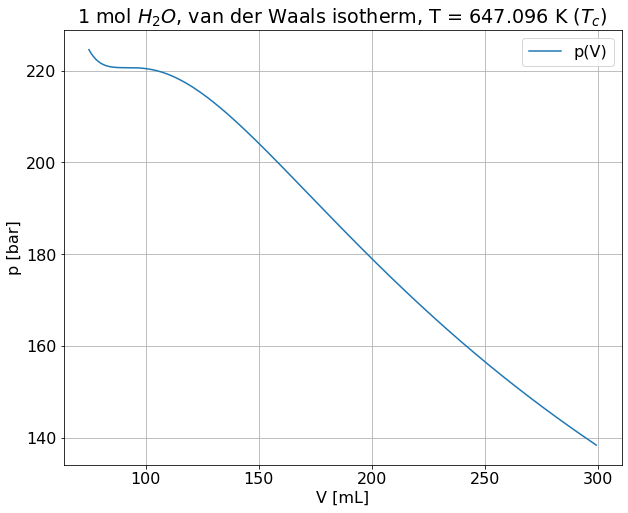

In [4]:
# Plotting p(V) with van der Waals equation of state
V = np.arange(75,300,1) # mL (1 mL increment per step)
V_m3 = V * 1e-6 # convert volume to m^3 to use in the state equation
p_V = vanDerWaals(V_m3, T_c) # pressure vs volume for critical temperature of H2O

# Plots van der Waals
plt.title(rf"1 mol $H_2 O$, van der Waals isotherm, T = {T_c} K $(T_c)$")
plt.plot(V, p_V, label = "p(V)")
plt.ylabel("p [bar]")
plt.xlabel(rf"V [mL]")
plt.grid()
plt.legend()
plt.show()

Looking at an van der Waals isotherm for $H_2O$ at T = 550 K, we see a qualitative difference

![Alt text](fig2.png)

*Figure 1: From [1] Van der Waals isotherm for H2O at T = 550 K. The isotherm is unphysical between Vv = 51
mL and Vg = 286 mL and is replaced here by the curve at constant pressure approx. 111 bar*

The van der Waals isotherm at the critical temperature (647.096 K) represents the point at which the substance's gas and liquid phases coexist in equilibrium and their properties become indistinguishable. The isotherm exhibits an inflection point at this temperature, where the slope $dP/dV$ and curvature $d^2P/dV^2$ both equal zero. Around this point, the curve appears flatter, indicating a transition between the liquid and gas phases.

The van der Waals isotherm exhibits a more pronounced distinction between the gas and liquid phases at 550 K, when the temperature is below the critical temperature. The isotherm would have three distinct regions at 550 K:

1.) The gas phase, with a relatively flat curve that corresponds to low pressures and high volumes.

2.) The liquid phase, with a steeper curve that corresponds to high pressures and low volumes.

3.) A phase coexistence region (gas-liquid equilibrium) defined by a horizontal plateau in the isotherm. This region denotes the volume and pressure range in which both gas and liquid phases coexist in equilibrium. The pressure at this plateau is referred to as the substance's vapor pressure at that temperature.

In summary, the qualitative difference between the van der Waals isotherm for 1 mole of H2O at the critical temperature (647.096 K) and at 550 K is due to phase behavior and isotherm curve shape. The isotherm exhibits an inflection point at the critical temperature, and the gas and liquid phases become indistinguishable. At 550 K, the isotherm demonstrates a clear separation of the gas and liquid phases, as well as a region of phase coexistence defined by a horizontal plateau.

# Task 1 c)

Moving on, we want to find the vapor pressure curve for $H_2O$ where we need to solve the following non linear equations coming from Maxwells construction and van der Waals equation of state with a multivariate Newtons method:

\begin{equation}
p_0 = \frac{RT}{V_g-b}-\frac{a}{V_g^2} = \frac{RT}{V_v-b}-\frac{a}{V_v^2}
\end{equation}

\begin{equation}
\frac{RT}{V_g-V_v}ln\frac{V_g-b}{V_v-b}- \frac{a}{V_gV_v} = \frac{RT}{V_g-b} -  \frac{a}{V_g^2}
\end{equation}

Thus we find the vapor presure $p(T)$ by using the values obtained for $V_v(T)$ or $V_g(T)$. This describes the phase transition from vapor to liquid. Firstly as a little warmup, we can start off by checking the phase transition for a two-dimension Ising-model proposed by Lars Onsager in 1944, with the equation for the critical temperature

\begin{equation}
sinh^2(\frac{2c}{T_c}) = 1
\end{equation}

where the analytical solution can be shown to be

\begin{equation}
T_c = \frac{2c}{ln(1+\sqrt{2})}
\end{equation}

Using $c$ = 1 K, we have
$
T_c = 2.269185314 K
$

We can now implement the one dimensional Newton's method in Python and check the root it gives us.

In [5]:

def newtonsMethod(f, df, x_0, tol, N):
    """
    Calculate the solution for an linear equation system with Newton's method
    up to the accruacy of the tolerance value
    
    Parameters
    ----------
    f: function to solve with f(x) = 0
    df: derivative of f(x)
    x_0: inital guess for solution f(x) = 0
    tol = tolerance value to stop the iterations |f(x)| < error
    N : max amount of iterations for Newton's method

    Returns
    -----------
    x_i = linear approximation of f(x) at the n-th x
    i = the amount of iterations
    """
    # Defines the array an empty array to the x values and sets the first value to the guess
    x_i = np.zeros(N)
    x_i[0] = x_0

    # For loop that runs untill the max iteration is reached
    for i in range(N - 1):
        f_i = f(x_i[i]) # Function values

        # Retuns the solution if the change of x is smaller than the tolerance
        if np.abs(f_i) < tol:
            return x_i[0:i+1], i 

        df_i = df(x_i[i])

        # Avoid division by zero
        if math.isclose(df_i, 0.0):
            break

        x_i[i + 1] = x_i[i] - f_i / df_i

In [6]:
# For calculation error
def percentage_error(guess, true):
    """ 
    Parameters
    ----------
    guess: Value thet the newton method think is the solution
    true: The value of the solution calculated analytical

    Returns
    -----------
    the percent in value the guess is deviating from the true value
    """
    return np.abs(guess-true)/np.abs(true) * 100

In [7]:
c = 1 # [K]
Tc = lambda x: (np.sinh(2*c/x)**2) - 1 if x != 0 else -1 # Equation to solve
dTc = lambda x: - (4*np.cosh(2/x)*np.sinh(2/x)) / (x**2) # Derivative of equation
actual_root = 2.269185314 # [K] Kelvin, calculated analytically

# Making a header
headers = ["Initial Guess", "Newton root", "Error (%)", "Iterations"]
print("{:<15} {:<15} {:<15} {:<15}".format(*headers))

# Using newtons method with different initial guesses:
my_guesses = [1, 1.5, 2, 2.5, 3, 3.5, 4.5] # initial guesses

for test_x in my_guesses: 
    Tc_solve, i = newtonsMethod(Tc, dTc, test_x, 1e-6, 20)
    error = percentage_error(Tc_solve[-1], actual_root)
    row = [test_x, np.round(Tc_solve[-1], 8), np.round(error,8), i]
    print("{:<15} {:<15} {:<15} {:<15}".format(*row))

Initial Guess   Newton root     Error (%)       Iterations     
1               2.26918526      2.21e-06        7              
1.5             2.26918524      3.46e-06        5              
2               2.26918531      1e-08           4              
2.5             2.26918531      1e-08           4              
3               2.26918457      3.289e-05       5              
3.5             2.26918531      1.8e-07         10             
4.5             -2.26918509     199.99999005    9              


We see that the initial estimate that was poorly chosen, like for instance $x_0 = 4.5$, gave us a large error, for this specific problem it gave us the negative root. Good esimates are close to the final globally optimal parameter estimate. Good start values also require way less iterations. Observing the amount of iterations this takes for initial guesses that are quite off, shows just how powerful Newton's method really is in some well conditioned cases.

We see that the error and iterations is smallest for $x_0 = 2, 2.5$. This is because these guesses are really close to the actual root, and that makes the method converge really quickly, compared to other guesses that are further off. 

# Task 1 d)

Now we are going to look at the converging rate for the newton method. Converging rate is a measure of how fast the difference from the solution to the root is 0. The converging order is a number representation for the convergion rate. In the newton method we can expect to get a converging order of 2. The method that we are going to use to find the converging order for the function is:

\begin{equation}
p_i = \log \left( \frac{\frac{e_i}{e_{i-1}}}{\frac{e_{i-1}}{e_{i-2}}} \right)
\end{equation}

Where $e_i$ is:

\begin{equation}
e_i = \mid x_i - r \mid
\end{equation}

We find the converging order my looking at the convergence of the sequence $p_i$. 

Converging order : 1.9983773776725193


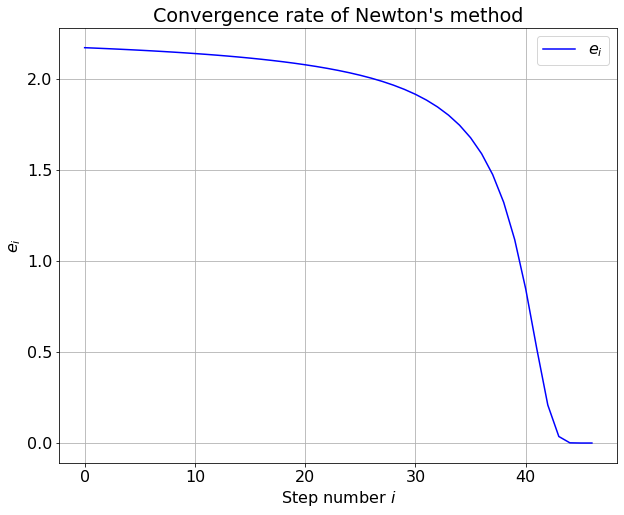

In [8]:
# Solves the system with initial guess of 0.1 to make a good graf 
Tc_solve = newtonsMethod(Tc, dTc, 0.1, 10e-10, 50)[0]
# Calculates the convergence rate for the solution
e_i = abs(Tc_solve - Tc_solve[-1])
# Create an array for all of the x values
x = np.arange(0,Tc_solve.shape[0])
# Calculates the converging order for this solution
p_i = np.log10(e_i[2:-1] / e_i[1:-2] ) / np.log10(e_i[1:-2] / e_i[0:-3] )

# Prints the converging order
print(f"Converging order : {p_i[-1]}")

# Plots the converging rate
plt.plot(x, e_i, color='blue', label = rf"$e_i$")
plt.title("Convergence rate of Newton's method")
plt.xlabel(rf'Step number $i$')
plt.ylabel(rf'$e_i$')
plt.legend()
plt.grid()

There are three types of convergences for, these being linier, sublinear and super linier convergence. These happened respectively with the conversion order of $q < 1$ , $q = 1$ and $q > 1$. We can now see that our converging order is close to equal to 2. This means that our newton method is converging as a superliner conversion. This is also easily observed by looking at the graph for the converging rate for the function.

Now we are going to solve a system of mutivarible equations with the newton method.

# Task 1 e)

We have the system of equations
\begin{equation}
f(V_g, V_v) = \frac{RT}{V_g-b}-\frac{a}{V_g^2} - \frac{RT}{V_v-b} + \frac{a}{V_v^2} = 0
\end{equation}

\begin{equation}
g(V_g, V_v) = \frac{RT}{V_g-V_v}ln\frac{V_g-b}{V_v-b}- \frac{a}{V_gV_v} - \frac{RT}{V_g-b} + \frac{a}{V_g^2} = 0
\end{equation}


Cumulatively we want to solve

\begin{equation}
\mathbb{f(\hat x) = J(\hat x)(x-\hat x)}
\end{equation}

Calculating the Jacobian by hand we get:

\begin{equation}
\frac{\partial f}{\partial V_g} = -\frac{RT}{(V_g-b)^2} + \frac{2a}{V_g^3}
\end{equation}

\begin{equation}
\frac{\partial f}{\partial V_v} = \frac{RT}{(V_v-b)^2} - \frac{2a}{V_v^3}
\end{equation}

\begin{equation}
\frac{\partial g}{\partial V_g} = -RT \left(\frac{\ln \left(\frac{V_g-b}{V_v-b}\right)}{\left(V_g-V_v\right)^2}+\frac{1}{\left(V_g-b\right)\left(V_g-V_v\right)}\right) + \frac{a}{V_g^2V_v} + \frac{1}{(V_g-b)^2} - \frac{2}{V_g^3}
\end{equation}

\begin{equation}
\frac{\partial g}{\partial V_v} = RT \left(\frac{\ln \left(\frac{V_g-b}{V_v-b}\right)}{\left(V_g-V_v\right)^2}+\frac{1}{\left(V_v-b\right)\left(V_g-V_v\right)}\right) + \frac{a}{V_gV_v^2}
\end{equation}

With sympy's libraries we can do the same to define the Jacobian and functions for the system. We start off by defining the system of the two equations given Maxwell's construction and its corresponding Jacobian with sympy.

In [9]:
# System of equations

# Define our symbols
sy_V_v, sy_V_g, sy_T, sy_R, sy_a, sy_b = sy.symbols('V_v V_g T R a b')

# Define some combinations of symbols usefull for our equations in (11) and (12)
RT = sy_R * sy_T
VG_b = sy_V_g - sy_b
VV_b = sy_V_v - sy_b

# Make the left and right hand sides of the equations in (11) and (12)
EQ11LHS = RT / (VG_b) - sy_a / (sy_V_g ** 2)
EQ11RHS = RT / (VV_b) - sy_a / (sy_V_v ** 2)
EQ12LHS = (RT / (VG_b - VV_b)) * sy.ln(VG_b / VV_b) - sy_a / (sy_V_v * sy_V_g)

sy_func_1 = EQ11LHS - EQ11RHS
sy_func_2 =  EQ12LHS - EQ11LHS

# Jacobian for the system. We also convert it into a lambda function
sy_J = sy.Matrix([sy_func_1, sy_func_2]).jacobian([sy_V_v, sy_V_g])
Jsylambd = sy.lambdify([sy_V_v, sy_V_g, sy_T, sy_R, sy_a, sy_b], sy_J)
J = lambda par: Jsylambd(par[0], par[1], par[2], R, a, b) # par = [V_v, V_g, T]

# Functions converted from func_1 and func_2
sy_lambd_func_1 = sy.lambdify([sy_V_v, sy_V_g, sy_T, sy_R, sy_a, sy_b], sy_func_1)
sy_lambd_func_2 = sy.lambdify([sy_V_v, sy_V_g, sy_T, sy_R, sy_a, sy_b], sy_func_2)
func_1 = lambda V_v, V_g, T: sy_lambd_func_1(V_v, V_g, T, R, a, b)
func_2 = lambda V_v, V_g, T: sy_lambd_func_2(V_v, V_g, T, R, a, b)
f = lambda par: np.array([func_1(par[0], par[1], par[2]), func_2(par[0], par[1], par[2])])  # par = [V_v, V_g, T]

Each function is lambdified and has the corresponding parameters given to it, in this case $V_v$, $V_g$ and $T$. This is now a system of non-linear equations that we can again as earlier, use newton's method to solve. It is essentially the exact same method to do it, just that we have two equations and need to calculate the Jacobian for it.

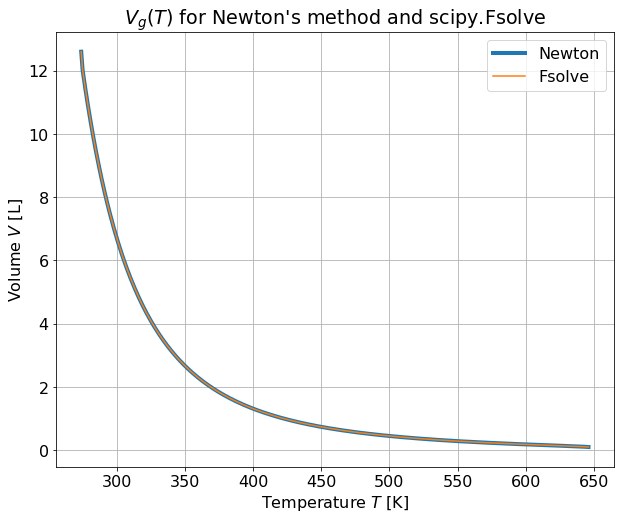

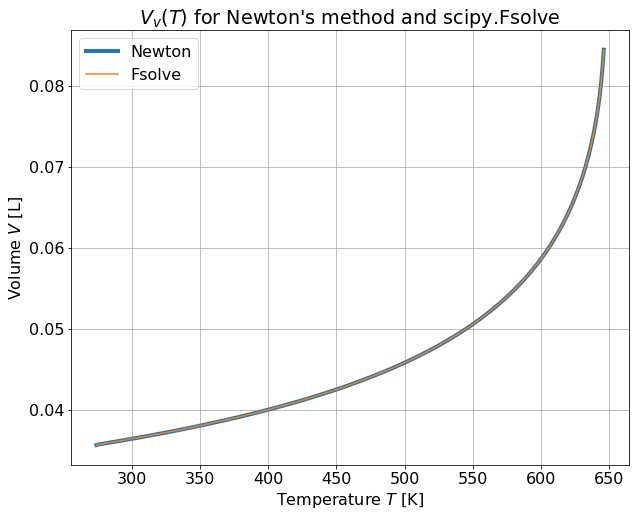

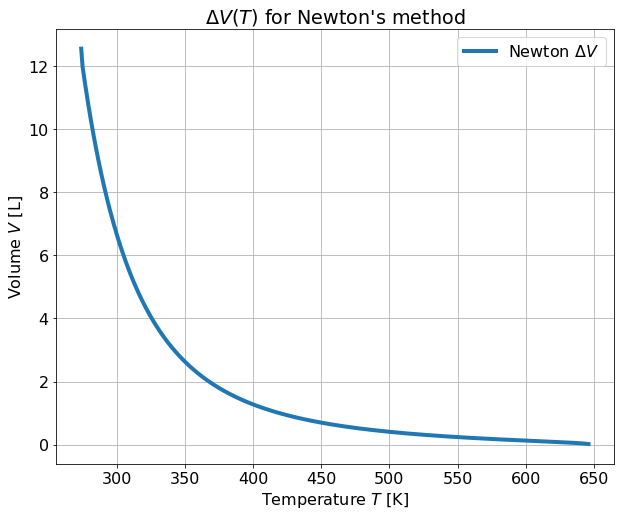

In [10]:
temps = np.arange(274.0, 647.0, 1.0) # [K] Kelvin

def newtonsMethodJacobian(F, J, x, eps, N):
    """ 
    Parameters
    ----------
    F: functions for the system F(x) = 0, where F is a list for the corresponding F(x) vector: [equation_one(x), equation_two(x)]
    J: Jacobian matrix for the system of equations
    x_0: inital guesses for solutions F(x) = 0, in this case the x0 vector: [guess_one, guess_two]
    eps: tolerance value to stop the iterations ||f(x)|| < eps
    N : max amount of iterations for convergence of solutions

    Returns
    -----------
    The solution in the form of [solution_one, solution_two]
    """
    
    iteration_counter = 0 # iteration counter
    # While loop that stops when the iteration conter is over the max allowed iterations
    while iteration_counter < N:
        Fx = F(x) # input x values to the system once per iteration
        F_norm = np.linalg.norm(Fx, ord=2) # Frobenius norm for Fx

        # Returns the solution if the norm is less then the tolerance value (converged to a root)
        if abs(F_norm) < eps:
            return np.array([x[0], x[1]])
        
        # calculate the change in x value and add the change on to the x value
        delta = np.linalg.solve(J(x), -Fx) # solving system with respect to delta
        x += np.pad(delta, (0, x.size - delta.size), 'constant') # update rule for the solutions
        iteration_counter += 1 # increase the iteration_value by one



valuesNewton = [0] * len(temps) # create an empty array for the solutions at the diffret tempratures for newton
valuesNewton[0] = [35.7e-6, 12.6e-3] # Initial guesses for newton
valuesFsolve = [0] * len(temps) # create an empty array for the solutions at the diffret tempratures for fsolve
valuesFsolve[0] = [35.7e-6, 12.6e-3] # Initial guesses for fsolve

# For loop for all the values of the temperature that the calculations is based on
for i in range(1, len(temps)):
    f = lambda par: np.array([func_1(par[0], par[1], temps[i]), func_2(par[0], par[1], temps[i])])  # par = [V_v, V_g, T]
    startvalue = np.array([valuesNewton[i - 1][0], valuesNewton[i - 1][1], temps[i]]) # create initial guesses based on the previous value
    valuesNewton[i] = newtonsMethodJacobian(f, J, startvalue, 1e-6, 100) # solves the system for the temperature with Newton's method
    valuesFsolve[i] = scipy.optimize.fsolve(f, startvalue[:len(startvalue)-1]) # solves the system for the temprature with fsolve

valuesNewton = np.array(valuesNewton) # convert array to numpy array
V_gValuesNewton = valuesNewton[:,1] # extract the V_g values
V_vValuesNewton = valuesNewton[:,0] # extract the V_v values
valuesFsolve = np.array(valuesFsolve) # convert array to numpy array
V_gValuesFsolve = valuesFsolve[:,1] # extract the V_g values
V_vValuesFsolve = valuesFsolve[:,0] # extract the V_v values

# Plots both fsolve and newton method for comparison
plt.title(rf"$V_g (T)$ for Newton's method and scipy.Fsolve")
plt.plot(temps, V_gValuesNewton*1e3, label = "Newton", linewidth=4)
plt.plot(temps, V_gValuesFsolve*1e3, label = "Fsolve")
plt.xlabel(rf'Temperature $T$ [K]'); plt.ylabel(rf'Volume $V$ [L]')
plt.legend(); plt.grid(); plt.show()

# Plots both fsolve and newton method for comparison
plt.title(rf"$V_v (T)$ for Newton's method and scipy.Fsolve")
plt.plot(temps, V_vValuesNewton*1e3, label = "Newton", linewidth=4)
plt.plot(temps, V_vValuesFsolve*1e3, label = "Fsolve")
plt.xlabel(rf'Temperature $T$ [K]'); plt.ylabel(rf'Volume $V$ [L]')
plt.legend(); plt.grid(); plt.show()

# Plots both delta V
plt.title(rf"$\Delta V(T)$ for Newton's method")
plt.plot(temps, np.abs(V_gValuesNewton - V_vValuesNewton) *1e3, label = rf"Newton $\Delta V$", linewidth=4)
plt.xlabel(rf'Temperature $T$ [K]'); plt.ylabel(rf'Volume $V$ [L]')
plt.legend(); plt.grid(); plt.show()


By comparison with scipy's fsolve and our algorithm with Newton's multivariate method, it is evident that the liquid volume will increase exponentially with the increment of temperature, whereas the gas volume decreases as the temperature increases. 

When we approach the critical temperature $T_c$, the change volume difference $\Delta V = |V_g - V_v|$ approaches zero. This tells us that as we approach the critical temperature, the specific volume for the liquid and vapor phases are now essentially equal.

# Task 1 f)

Now that we have obtained values for $V_g(T)$ and $V_v(T)$, we can finally compare it with experimental values to see just how precise van Der Waals equation of state really is. Firsly we check the equilibrium pressure for the volumes we obtained and use them in equation (11).


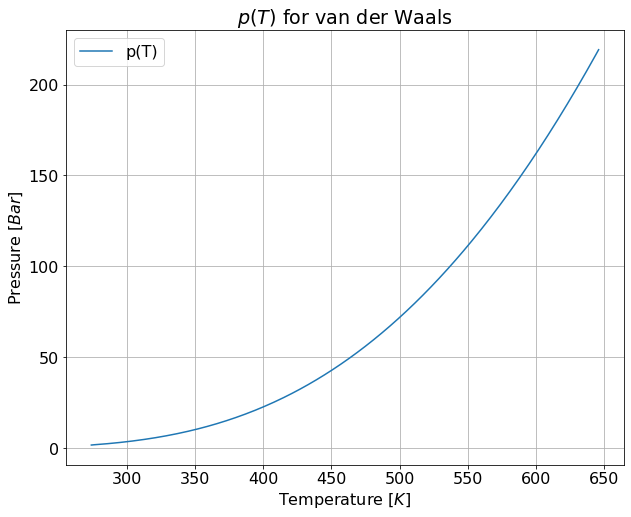

In [11]:
p0function = lambda V, T: R*T / (V-b) - a/(V**2) # create the function for calculating the pressure
p0 = p0function(V_gValuesNewton, temps) # pressure for V_g
p1 = p0function(V_vValuesNewton, temps) # pressure for V_v

# plots the pressure for V_g
plt.title(rf"$p(T)$ for van der Waals")
plt.plot(temps, p0 * 1e-5, label = "p(T)") # T [K], P [Bar] 
plt.xlabel(rf'Temperature $[K]$'); plt.ylabel(rf'Pressure $[Bar]$')
plt.grid(); plt.legend(); plt.show()

From source [3] we get the following experimental values for the vapor pressure between the triple point and the critical point $[ T_t = 273.16 K,  T_c = 647.096 K ]$

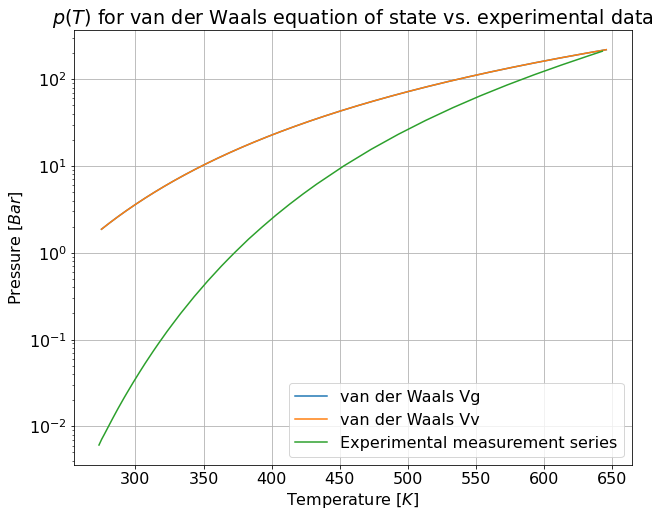

In [12]:
# get the experimental values for the presures at diffrent tempratures
P_V_experimental = np.array([[0.01, 0.0060],[2, 0.0070],[4, 0.0080],
        [10, 0.0121],[14, 0.0158],[18, 0.0204],
        [20, 0.0231],[25, 0.0313],[30, 0.0419],
        [34, 0.0526],[40, 0.0729],[44, 0.0899],
        [50, 0.122],[54, 0.148],[60, 0.197],
        [70, 0.308],[80, 0.468],[90, 0.693],
        [96, 0.866],[100, 1.001],[110, 1.42],
        [120, 1.96],[130, 2.67],[140, 3.57],
        [150, 4.70],[160, 6.10],[180, 9.90],
        [200, 15.35],[220, 22.89],[240, 33.03],
        [260, 46.31],[280, 63.33],[300, 84.76],
        [320, 111.4],[340, 144.1],[360, 184.2],
        [370, 207.7]])

# Convert temperature from Celsius to Kelvin
P_V_experimental = [[temp + 273.15, pressure * 1.01325] for temp, pressure in P_V_experimental]

# Extract temperature and pressure values into separate lists
experimental_T = np.array([temp for temp, pressure in P_V_experimental])
experimental_p = np.array([pressure * 1e5 for temp, pressure in P_V_experimental])
T = np.linspace(273, 675, 675 - 273)

# logorythmic plot for experimental and numerical data
plt.plot(temps[1:], p0[1:] * 1e-5, label= "van der Waals Vg")
plt.plot(temps[1:], p1[1:] * 1e-5, label= "van der Waals Vv")
plt.title(rf"$p(T)$ for van der Waals equation of state vs. experimental data")
plt.plot(experimental_T, experimental_p * 1e-5, label="Experimental measurement series")
plt.xlabel(rf'Temperature $[K]$'); plt.ylabel(rf'Pressure $[Bar]$')
plt.yscale("log")
plt.grid(); plt.legend(); plt.show()

It seems as van der Waals is horribly overshooting the pressure at lower temperatures. The lower the temperature, the more van der Waals deviates from experimental values. What we see is essentially from the limitations on describing the effects of intermolecular forces on real gases. At lower temperatures, the kinetic energy of the gas particles decrease, where intermolecular forces are more pronounced. At lower temperatures water also undergoes phase transitions in just the span on $100 K$, where the equation does not account for the behavior during the transitions accurately. This is as expected from the limitations of van der Waals.

# Task 1 g)

Our goal is now to do a little comparison with the volumes we obtained above, and van der Waals equation we defined earlier. We want to investigate what happens with some isotherm. In this case let us check what happens at some specific temperature, say $T = 600 K$.

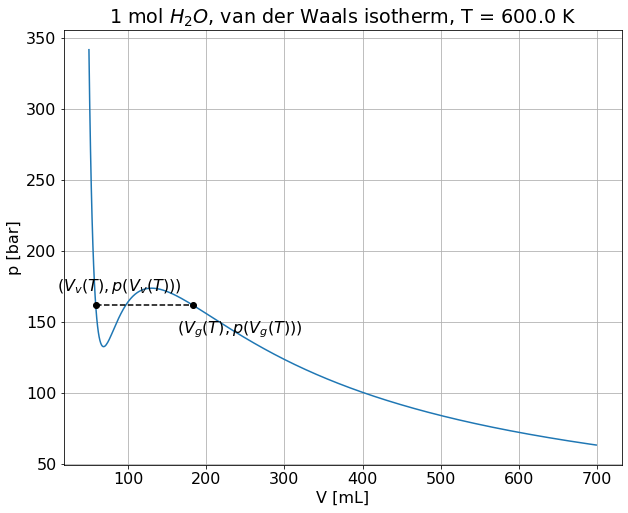

In [13]:
N = 326 # some specific temperature index in array -> (leads to 600K here)
T = temps[N] # [K]

# Plotting p(V) with van der Waals equation of state
V = np.arange(50, 700, 1) # mL (1 mL increment per step)
V_m3 = V*1e-6 # volume to use in the state equation
p_V = vanDerWaals(V_m3, T) # pressure vs volume for critical temperature of H2O

# Plotting the van der Waals isotherm
plt.title(rf"1 mol $H_2 O$, van der Waals isotherm, T = {T} K")
plt.plot(V, p_V, label = "p(V)")
plt.ylabel("p [bar]")
plt.xlabel(rf"V [mL]")

# Marking the points (Vv(T), p(Vv(T)) and Vg(T), p(Vg(T)))
Vv_T = [V_vValuesNewton[N]*1e6, vanDerWaals(V_vValuesNewton[N], T)]
Vg_T = [V_gValuesNewton[N]*1e6, vanDerWaals(V_gValuesNewton[N], T)]

# Plots p(V)
plt.plot([Vv_T[0], Vg_T[0]], [Vv_T[1], Vg_T[1]], 'o', linestyle="--", color = "black")
plt.text(Vv_T[0]-50, Vv_T[1]+10, rf"$(V_v(T), p(V_v(T)))$")
plt.text(Vg_T[0]-20, Vg_T[1]-20, rf"$(V_g(T), p(V_g(T)))$")
plt.grid(); plt.show()

 What we see here is a characteristic shape that describes the coexistence regions, liquid and vapor regions. Between the two points $(V_v(T), p(V_v(T)))$ and $(V_g(T), p(V_g(T)))$ we draw a line. The points describe the liquid and gas volumes given at this specific temperature we chose $T = 600K$ and this region that draws a line is essentially where the pressure is constant and everything under and over is unphysical. For the gas phase, volumes larger than $V_g(T)$, the curve will represent the gas phase of $H_2O$ with low pressure and high volume, whereas the opposite holds for $V_v(T)$.

 It is important to note that the van der Waals equation does not fully describe the actual behavior of water due to the simplifications mentioned above. The shape of the curve may not be perfectly accurate, especially at low temperatures or near critical points where deviations from the equation are greater. However, the general behavior of the p-V relationship, including gas-phase, liquid-phase, and phase-coexistence regions, can be qualitatively observed. 

# Task 1 h)

As one last check with the van der Waals equation, we can use our earlier results for the volumes to make a $p-V$ phase diagram for $H_2O$. We do this by plotting $p(V_v)$ and $p(V_g)$ in the same figure.

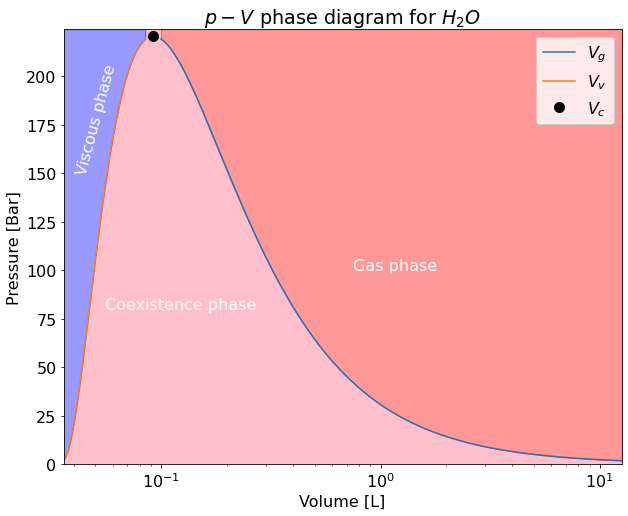

In [14]:

pVv = vanDerWaals(V_vValuesNewton, temps) # calculate P(V_v) with values form newton
pVg = vanDerWaals(V_gValuesNewton, temps) # calculate P(V_g) with values form newton

Vv = V_vValuesNewton * 1e6 # Adjust to ml
Vg = V_gValuesNewton * 1e6 # Adjust to ml

V = np.arange(50,700,1) # mL (1 mL increment per step)
V_m3 = V*1e-6 # volume to use in the state equation
p_V = vanDerWaals(V_m3, T_c) # pressure vs volume for critical temperature of H2O

# Plots the isoterm and V_v and V_g
plt.title("$p-V$ phase diagram for $H_2O$")

# Remove first inaccurate point by array slicing
pV_Vg = np.copy(Vg)
pV_pVg = np.copy(pVg)
pV_Vv = Vv[1:]
pV_pVv = pVv[1:]
top = pV_pVg[-1] + 5

# Some plotting designs
viscouscolor = "blue"
gascolor = "red"
mixcolor = "pink"
plt.plot(pV_Vg / 1000.0, pV_pVg, label = r"$V_g$")
plt.plot(pV_Vv / 1000.0, pV_pVv, label = r"$V_v$")
plt.fill_between(pV_Vg / 1000.0, pV_pVg, color = mixcolor) # right purple
plt.fill_between(pV_Vv / 1000.0, pV_pVv, color = mixcolor) # left purple
plt.fill_between([pV_Vv[-1] / 1000.0, pV_Vg[-1] / 1000.0], [top, top], color = mixcolor) # Bit between plots ( as the Vg and Vv plots aren't fully connected in the center )
plt.fill_between(pV_Vg / 1000.0, pV_pVg, top, alpha = 0.4, color = gascolor)
plt.fill_between(pV_Vv / 1000.0, pV_pVv, top, alpha = 0.4, color = viscouscolor)
plt.plot(V_c * 1e3, p_c * 1e-5, "o", color = "black", markersize=10, label = r"$V_c$")
plt.text(5.5e-2,80, "Coexistence phase", color = "white", size = 16)
plt.text(75e-2,100, "Gas phase", color = "white", size = 16)
plt.text(4e-2,150, "Viscous phase", color = "white", rotation = 75, size = 16)
plt.ylabel("Pressure [Bar]"); plt.xlabel(rf"Volume [L]")
plt.xlim([pV_Vv[0] / 1000.0, pV_Vg[0] / 1000.0])
plt.ylim([0, top])
plt.xscale("log")
plt.legend(); plt.show()

Gas phase area: This region is located to the right of the $V_g$ curve, where the specific volume is relatively large, and the pressure is relatively low. Here, water exists predominantly in the gas phase, with particles spread out and interacting weakly.

Liquid phase area: This region is located to the left of the $V_v$ curve, where the specific volume is relatively small, and the pressure is relatively high. In this area, water exists predominantly in the liquid phase, with closely packed particles and strong intermolecular forces.

Two-phase area: This region is located between the $V_v$ and $V_g$ curves and represents the coexistence of both liquid and gas phases. It is characterized by a line, known as the vapor pressure curve, which separates the single-phase areas. The vapor pressure curve indicates the equilibrium pressure for a given temperature at which the liquid and gas phases coexist. The two-phase area is also called the gas-liquid equilibrium region.

As we have seen, van der Waals equation of state fails to be any precise predicting pressure vs. temperature, however it is a massive improvement from ideal gas law and has actively demonstrated the phase transition from liquid water to water vapor.

Because we have suffered hard numerical deviations from experimental values, we need to find a way to minimize the errors. This is exactly the motivation for what we will do further on; namely interpolation and usage of experimental data.

# Task 2a)

Let us start off simply by importing some experimental values for $V_v$, $V_g$ and $L$ as functions of T. Getting this directly from [1] throuhg [4] and [5] we have all the values extracted in .txt format, and we read it with a simple function in Python:

In [15]:
def read_exp_data(filename, col1, col2):
    """
    Read correctly formatted .txt file and extract columns of information
    Parameters
    ----------
    filename: name of the file that is beeing read
    col1: first colum that is read
    col2: second colum that is read

    Returns
    -----------
    Tha data of the chosen colums (col1, col2)
    """

    with open(filename, 'r') as f: # opens the file
        column1 = []; column2 = [] # create the lists for each colum
        for line in f: # for loop for every row in the file
            columns = line.split() # decide what seperates the data
            column1.append(float(columns[col1])) # adds the data form col1 to the col1 array
            column2.append(float(columns[col2])) # adds the data form col2 to the col2 array
        
    return np.array(column1), np.array(column2) # return both colums

Some of the datasets don't directly contain the volumes, nor the correct temperatures or units. As such we calculate the heat of vaporization L for 1 mol of H20 from the L_density in L_data.txt. We also calculate Vv and Vv from the volume density in Vg_data.txt and Vv_data.txt using the equation: $$ Volume =  \frac{mass}{density}$$

In [16]:
### DATA FOR VOLUME VS. TEMPERATURE FROM [1] extracted
Vv_exp_temp, Vv_exp_density = read_exp_data('Vv_data.txt', 0, 3) # [Kelvin, M^3]
Vg_exp_temp, Vg_exp_density = read_exp_data('Vg_data.txt', 0, 3) # [Kelvin, M^3]
L_exp_temp, L_exp_energy_density = read_exp_data('L_data.txt', 0, 3) # [Celcius, kJ / kg]

## Conversion of units --------------------

# Celsius to Kelvin
L_exp_temp += 273.15

# L_density to energy
L_exp = L_exp_energy_density * (18 * 1e-3)
L_exp *= 1000 # kJ -> Joules

# Density and mass to volume
Vv_exp = 18.0 * 1e-3 / Vv_exp_density
Vg_exp = 18.0 * 1e-3 / Vg_exp_density


# Task 2 b)

With values ​​for $V_v$, $V_g$ and $L$ only defined at certain temperatures, it is difficult
to integrate equation (13) exactly. A solution to this is to interpolate the data set so that
you get an estimate for continuous functions that describe $V_v$, $V_g$ and $L$ as a function
of temperature. In the next subtasks, we will take a closer look at two ways to do this.
The first thing you are asked to do is to look for suitable functions that provide usable
adaptation to each of the experimental measurement series from [3], [4] and [5]. We can start by plotting the experimental series first!

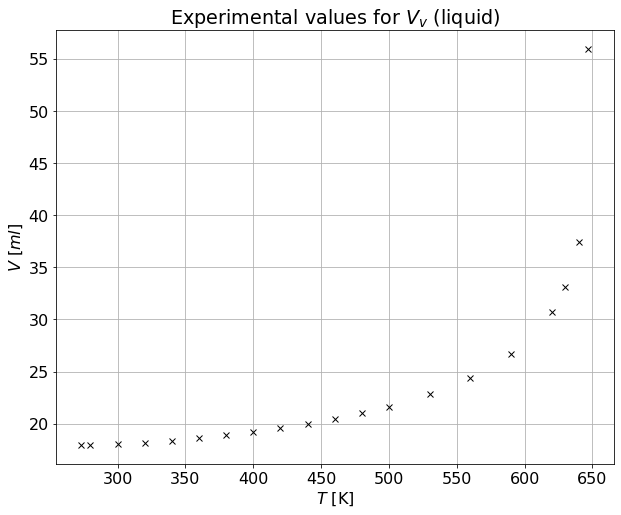

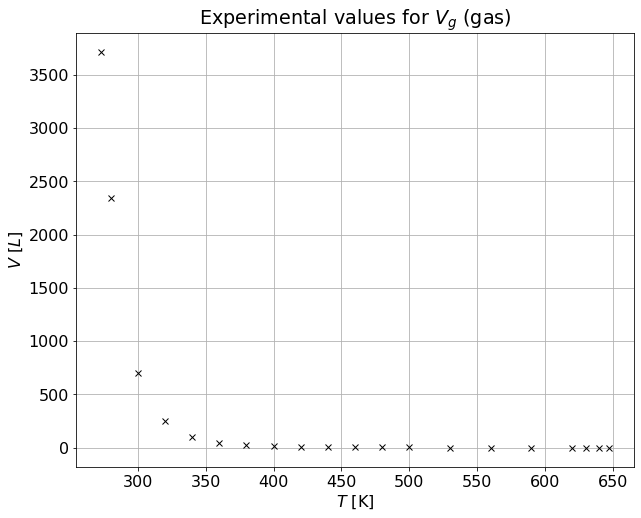

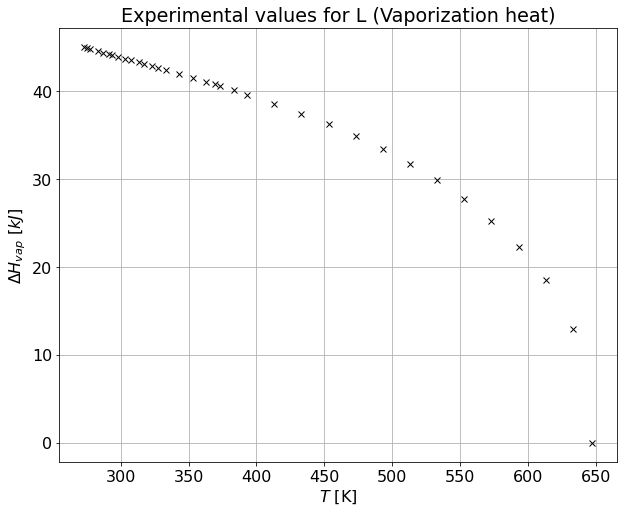

In [17]:
# Plotting experimental data for liquid
plt.title("Experimental values for $V_v$ (liquid)")
plt.plot(Vv_exp_temp, Vv_exp * 1e6, "x", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(rf"$V$ $[ml]$")
plt.grid(); plt.show()

# Plotting experimental data for gas
plt.title("Experimental values for $V_g$ (gas)")
plt.plot(Vg_exp_temp, Vg_exp * 1e3, "x", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(rf"$V$ $[L]$")
plt.grid(); plt.show()

# Plotting experimental data for vaporization heat
plt.title("Experimental values for L (Vaporization heat)")
plt.plot(L_exp_temp, L_exp * 1e-3, "x", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(r"$\Delta H_{vap}$ $[kJ]$")
plt.grid(); plt.show()

Let's check if we can get some good approximations to the curves with scipy's "scipy.optimize.curve_fit".
For this we need to select some arbitary base functions that we can plug into scipy's function and find some fit parameters.
As such we used the hint we were given by the task and used the following function for L:

\begin{equation}
    L(T) = a|T_c - T|^b + c
\end{equation}

Further on, after some testing, we found that modifying this function gave us some good approximations for the Vv and Vg curves.
The best ones we found were:
\begin{equation}
    Vv(T) = a|b - T / T_c|^c + d
\end{equation}
and
\begin{equation}
    Vg(T) = |a- T / T_c|^b + c
\end{equation}

After defining these functions in the code down below, we used the curve_fit function as described and got some parameters  a, b, c and d for these equations. We then defined
some now lambda functions so we didn't have to manually input these parameters every time we want to use them. As such they were only functions of T as we wanted.

Having found these approximations, we can now plot them. We will also plot the y log scaled versions of them to see how well they fit at different scales.

C:\Users\Auril\AppData\Local\Temp/ipykernel_12732/3668531467.py:3: RuntimeWarning: divide by zero encountered in power
  return a * np.abs(T_c - T)**b + c


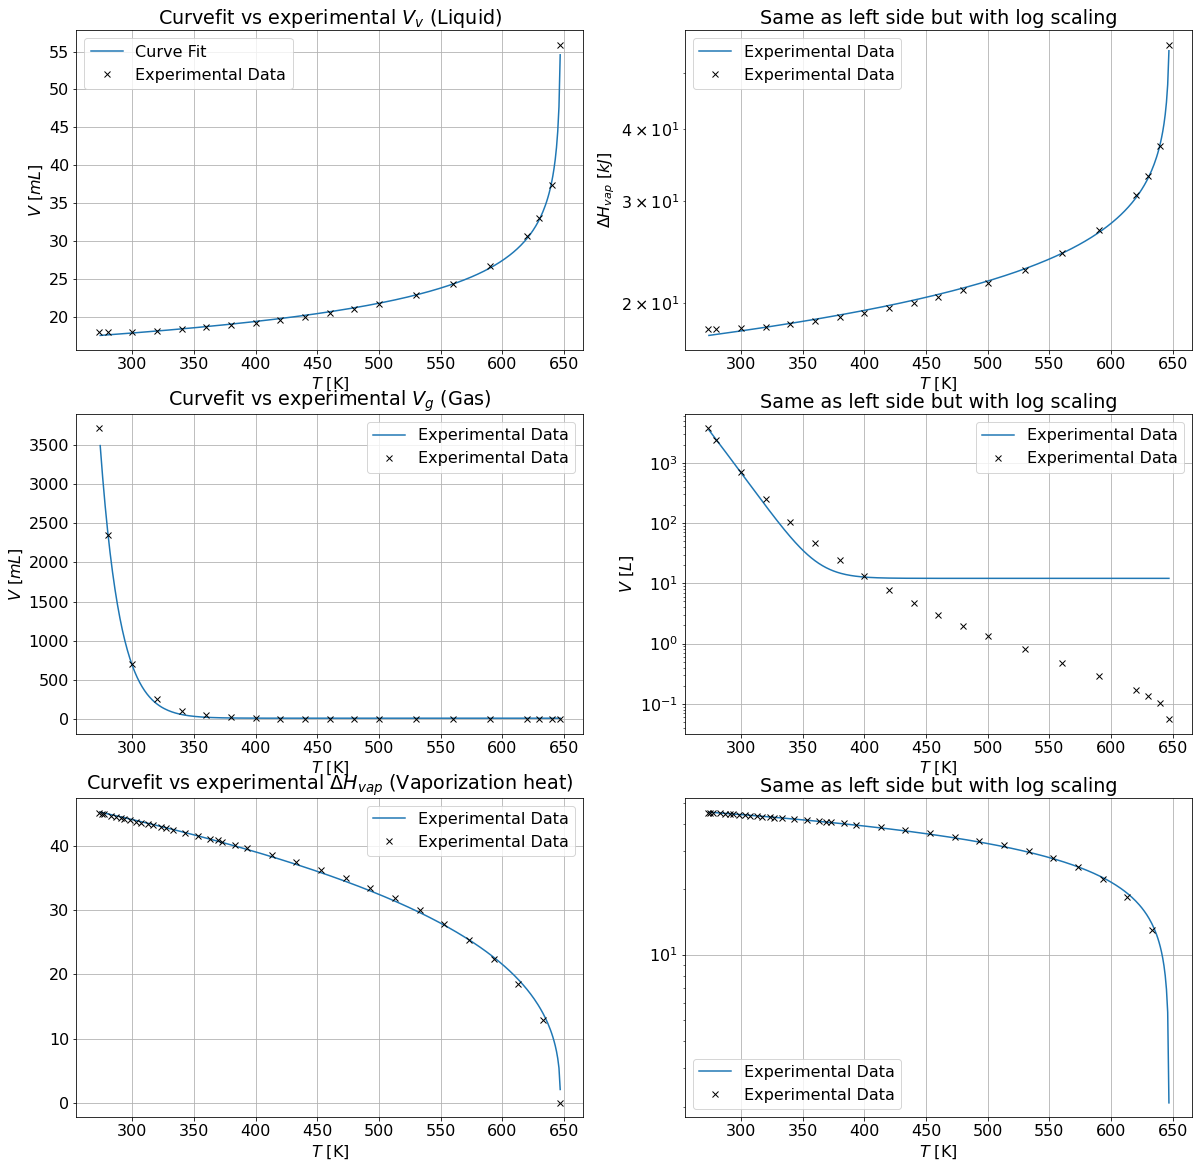

In [18]:
# Create the guesses of the functions form for L, V_v and V_g
def L(T, a, b, c):
    return a * np.abs(T_c - T)**b + c

def Vv(T, a, b, c, d):
    return a * np.abs(b - T / T_c)**c + d

def Vg(T, a, b, c):
    return np.abs(a - T / T_c)**b + c

# Calculate the parameters for the functions for L, V_v and V_g
L_fit, covariance_L = scipy.optimize.curve_fit(L, L_exp_temp, L_exp)
Vv_fit, covariance_Vv = scipy.optimize.curve_fit(Vv, Vv_exp_temp, Vv_exp)
Vg_fit, covariance_Vg = scipy.optimize.curve_fit(Vg, Vg_exp_temp, Vg_exp)

# create the functions with the parameters that we found
L_curve = lambda T:  L(T, *L_fit)
Vv_curve = lambda T:  Vv(T, *Vv_fit)
Vg_curve = lambda T:  Vg(T, *Vg_fit)

T = np.arange(274, T_c, 1) # create the array for the temperature
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# Plotting experimental data and the fit function for liquid
axs[0, 0].set_title("Curvefit vs experimental $V_v$ (Liquid)")
axs[0, 0].plot(T, Vv_curve(T) * 1e6, label = "Curve Fit")
axs[0, 0].plot(Vv_exp_temp, Vv_exp * 1e6, "x", label = "Experimental Data", color = "black")
axs[0, 0].set_xlabel(rf"$T$ [K]"); axs[0, 0].set_ylabel(rf"$V$ $[mL]$")
axs[0, 0].legend()
axs[0, 0].grid()

# Plot the same data but with log scaling on the y-axis
axs[0, 1].set_title("Same as left side but with log scaling")
axs[0, 1].plot(T, Vv_curve(T) * 1e6, label = "Experimental Data")
axs[0, 1].plot(Vv_exp_temp, Vv_exp * 1e6, "x", label = "Experimental Data", color = "black")
axs[0, 1].set_xlabel(rf"$T$ [K]"); axs[1, 0].set_ylabel(rf"$V$ $[mL]$")
axs[0, 1].set_yscale("log")
axs[0, 1].legend()
axs[0, 1].grid()

# Plotting experimental data and the fit function for gas
axs[1, 0].set_title("Curvefit vs experimental $V_g$ (Gas)")
axs[1, 0].plot(T, Vg_curve(T) * 1e3, label = "Experimental Data")
axs[1, 0].plot(Vg_exp_temp, Vg_exp * 1e3, "x", label = "Experimental Data", color = "black")
axs[1, 0].set_xlabel(rf"$T$ [K]"); axs[0, 1].set_ylabel(rf"$V$ $[L]$")
axs[1, 0].legend()
axs[1, 0].grid()

# Plot the same data but with log scaling on the y-axis
axs[1, 1].set_title("Same as left side but with log scaling")
axs[1, 1].plot(T, Vg_curve(T) * 1e3, label = "Experimental Data")
axs[1, 1].plot(Vg_exp_temp, Vg_exp * 1e3, "x", label = "Experimental Data", color = "black")
axs[1, 1].set_xlabel(rf"$T$ [K]"); axs[1, 1].set_ylabel(rf"$V$ $[L]$")
axs[1, 1].set_yscale("log")
axs[1, 1].legend()
axs[1, 1].grid()

# Plotting experimental data and the fit function for vaporization heat
axs[2, 0].set_title("Curvefit vs experimental $\Delta H_{vap}$ (Vaporization heat)")
axs[2, 0].plot(T, L_curve(T) * 1e-3, label = "Experimental Data")
axs[2, 0].plot(L_exp_temp, L_exp * 1e-3, "x", label = "Experimental Data", color = "black")
axs[2, 0].set_xlabel(rf"$T$ [K]"); axs[0, 1].set_ylabel(rf"$V$ $[L]$")
axs[2, 0].legend()
axs[2, 0].grid()

# Plot the same data but with log scaling on the y-axis
axs[2, 1].set_title("Same as left side but with log scaling")
axs[2, 1].plot(T, L_curve(T) * 1e-3, label = "Experimental Data")
axs[2, 1].plot(L_exp_temp, L_exp * 1e-3, "x", label = "Experimental Data", color = "black")
axs[2, 1].set_xlabel(rf"$T$ [K]"); axs[0, 1].set_ylabel(r"$\Delta H_{vap}$ $[kJ]$")
axs[2, 1].set_yscale("log")
axs[2, 1].legend()
axs[2, 1].grid()


As we can see the curves look like they are fitting quite nicely on the normal plots to the left. However, when looking at the log scaled versions of the curves, we clearly see that the curvefit for $V_g$ is way off after the center of the graph. As such we would expect some great numerical errors in our integration of this curve later. As the $V_g$ curve fit gets a curve with larger values than the experimental values, we would expect that the integral starts of looking correctly, but creatly underestimates the integral at larger values of T. We would also expect this inconsistency to begin at over 425 degrees kelvin. 

Furthermore, we see that the curve almost matches a straight line in the log scale. As such we can do a much better estimation by approximating the curve in the log scale and then doing an inverse. We will thus, do this in the next code block. As we see the log curve isn't directly a straight line so we will approximate it by a third degree polynomial

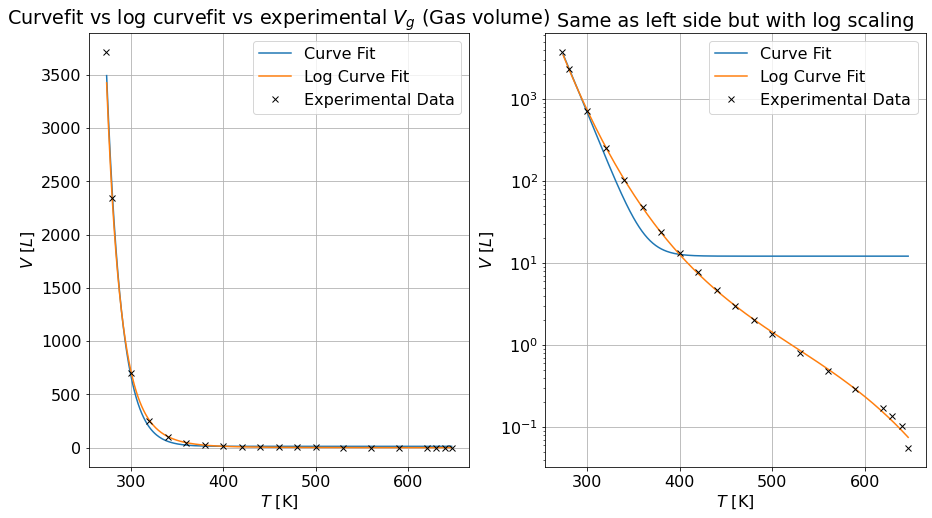

In [19]:
def Vg_log(T, a, b, c, d):
    return a*T**3 + b*T**2 + c*T + d

# Calculate the new parameters for the functions for V_g
Vg_log_fit, covariance_Vg = scipy.optimize.curve_fit(Vg_log, Vg_exp_temp, np.log10(Vg_exp))

# create the functions with the parameters that we found
Log_fit_Vg_curve = lambda T:  10**Vg_log(T, *Vg_log_fit)
# Plotting experimental data and the fit function for gas
fig, axs = plt.subplots(1, 2, figsize = (15, 8))
axs[0].set_title("Curvefit vs log curvefit vs experimental $V_g$ (Gas volume)")
axs[0].plot(T, Vg_curve(T) * 1e3, label = "Curve Fit")
axs[0].plot(T, Log_fit_Vg_curve(T) * 1e3, label = "Log Curve Fit")
axs[0].plot(Vg_exp_temp, Vg_exp * 1e3, "x", label = "Experimental Data", color = "black")
axs[0].set_xlabel(rf"$T$ [K]"); axs[0].set_ylabel(rf"$V$ $[L]$")
axs[0].legend()
axs[0].grid()

# Plot the same data but with log scaling on the y-axis
axs[1].set_title("Same as left side but with log scaling")
axs[1].plot(T, Vg_curve(T) * 1e3, label = "Curve Fit")
axs[1].plot(T, Log_fit_Vg_curve(T) * 1e3, label = "Log Curve Fit")
axs[1].plot(Vg_exp_temp, Vg_exp * 1e3, "x", label = "Experimental Data", color = "black")
axs[1].set_xlabel(rf"$T$ [K]"); axs[1].set_ylabel(rf"$V$ $[L]$")
axs[1].set_yscale("log")
axs[1].legend()
axs[1].grid()

As expected, we can't see a major change in the non log scaled version. However, in the log scaled version, this new estimation for Vg gives us a much better curve fit. This will have major implications for the later tasks, as the log curvefit estimate will now be very close to the spline fit.

# Task 2 c)

To integrate equation (13) we can use Simpon's method numerically from $T_t$ all the way to T for all integer temperatures on the closed interval $[274,647]$ K which will give us an numerical approximation for $p(T)$

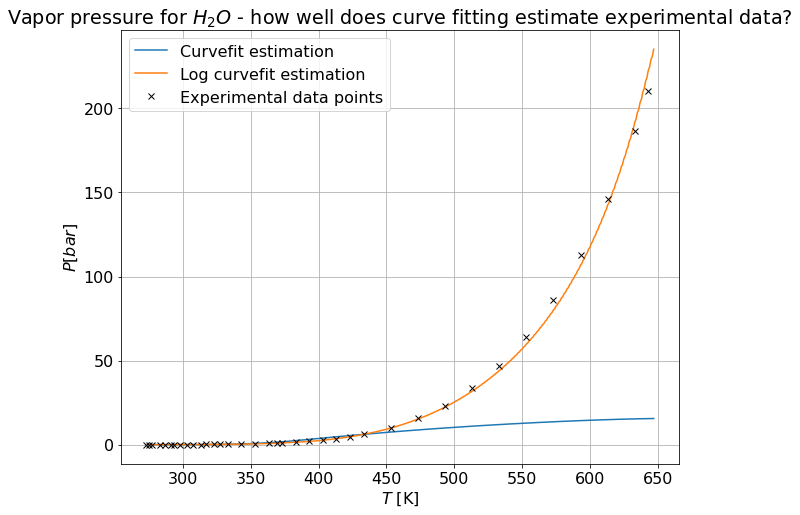

In [20]:
def simpsonsMethod(y, x):
    """
    Preforms the simpsons method for integration on the given function
    ----------
    y: the range of value for the function
    x: the range of the steps for the function

    Returns
    -----------
    Tha data of the chosen colums (col1, col2)
    """
    h = (x[-1] - x[0]) / len(x) # creats the constent h
    sum1 = np.sum(y[1:-1:2]) * 4 # finds all the odd steps for the funtion and multiply it by 4
    sum2 = np.sum(y[2:-1:2]) * 2# finds all the even steps for the funtion and multiply it by 2
    return (h/3) * (y[0] + sum1 + sum2 + y[-1]) # return the anwser for the integral

def dp(Vv, Vg, L, T):
    """
    The function for dp
    ----------
    Vv: the volum for liquid
    Vg: the volum for gass
    L: vaporization heat
    T: the tempratures
    Returns
    -----------
    The solution of the funtion
    """
    return L / (T*(Vg - Vv))

Pfunctions = np.zeros_like(T) # create an empty array for the integral for each step
Pfunctionslog = np.zeros_like(T) # create an empty array for the integral for each step
Pexperimental = np.zeros_like(L_exp_temp[:len(L_exp)])

for i in range(1, len(T)): # for loop for each temprature 
    Pfunctions[i] = simpsonsMethod(dp(Vv_curve(T[:i]), Vg_curve(T[:i]), L_curve(T[:i]), T[:i]), T[:i]) # calculates the integral up to the current temprature
    Pfunctionslog[i] = simpsonsMethod(dp(Vv_curve(T[:i]), Log_fit_Vg_curve(T[:i]), L_curve(T[:i]), T[:i]), T[:i]) # calculates the integral up to the current temprature

# plots the integrals
plt.title("Vapor pressure for $H_2O$ - how well does curve fitting estimate experimental data?")
plt.plot(T, Pfunctions*1e-5 , label="Curvefit estimation")
plt.plot(T, Pfunctionslog*1e-5 , label="Log curvefit estimation")
plt.plot(experimental_T, experimental_p*1e-5, "x", label="Experimental data points", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(rf"$P [bar]$")
plt.legend();plt.grid();plt.show()

Looking at these different plots, we see that the base curvefit for the experimental values work exactly as we predicted. After around 430 ish kelvin, the curvefit for the experimental values match very badly with the actual values. However, looking at the log curvefit it works fits very nicely, and alot better than the normal curvefit.

# Task 2 d)

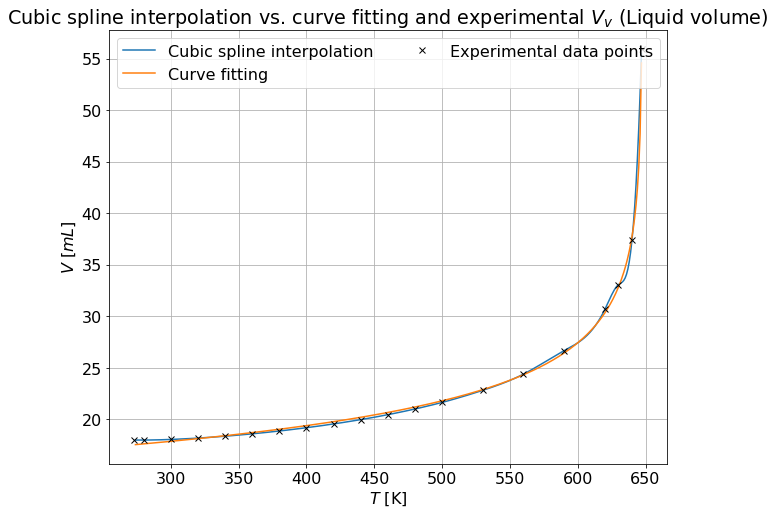

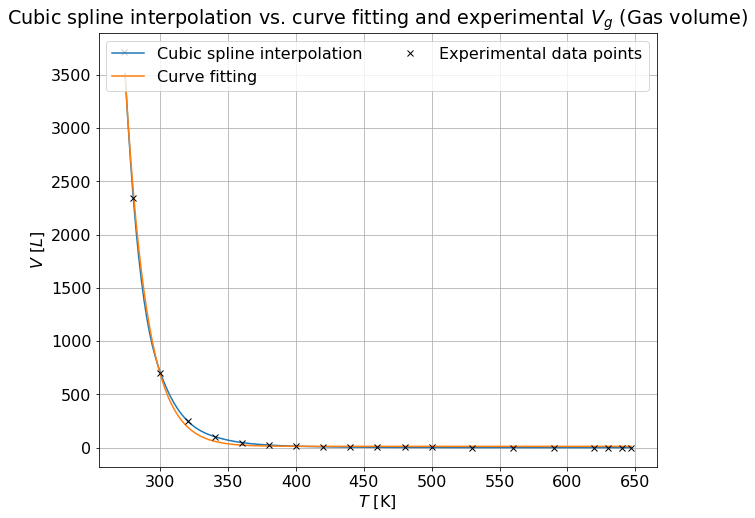

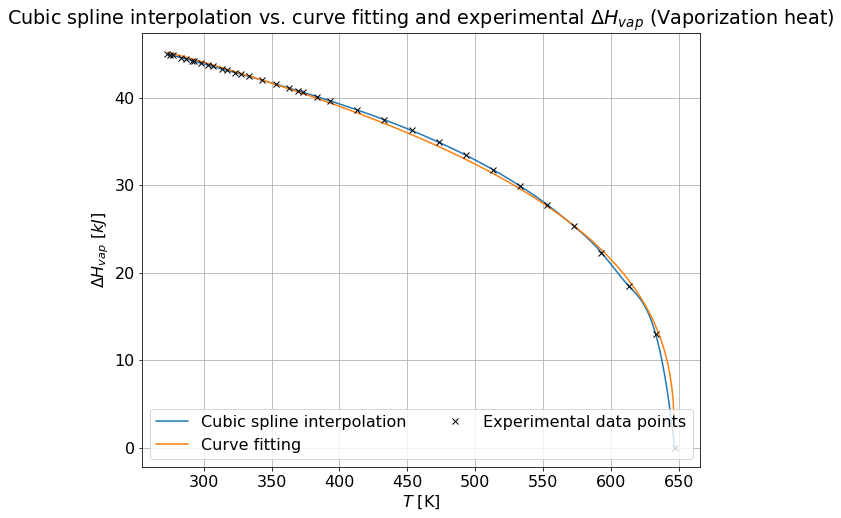

In [21]:
# Calculate the qubic spline for V_v , V_g and L
Vv_spline = scipy.interpolate.CubicSpline(Vv_exp_temp, Vv_exp)
Vg_spline = scipy.interpolate.CubicSpline(Vg_exp_temp, Vg_exp)
L_spline = scipy.interpolate.CubicSpline(L_exp_temp, L_exp)

# plots the V_v spline and the data points
plt.title("Cubic spline interpolation vs. curve fitting and experimental $V_v$ (Liquid volume)")
plt.plot(T, Vv_spline(T)*1e6, label="Cubic spline interpolation")
plt.plot(T, Vv_curve(T)*1e6, label = "Curve fitting")
plt.plot(Vv_exp_temp, Vv_exp*1e6, "x", label = "Experimental data points", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(rf"$V$ $[mL]$")
plt.legend(loc='upper left', ncol=2); plt.grid()
plt.show()

# plots the V_g spline and the data points
plt.title("Cubic spline interpolation vs. curve fitting and experimental $V_g$ (Gas volume)")
plt.plot(T, Vg_spline(T)*1e3, label="Cubic spline interpolation")
plt.plot(T, Vg_curve(T)*1e3, label = "Curve fitting")
plt.plot(Vg_exp_temp, Vg_exp*1e3, "x", label = "Experimental data points", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(rf"$V$ $[L]$")
plt.legend(loc='upper right', ncol=2); plt.grid()
plt.show()

# plots the L spline and the data points
plt.title("Cubic spline interpolation vs. curve fitting and experimental $\Delta H_{vap}$ (Vaporization heat)")
plt.plot(T, L_spline(T) * 1e-3, label="Cubic spline interpolation")
plt.plot(T, L_curve(T) * 1e-3, label = "Curve fitting")
plt.plot(L_exp_temp, L_exp * 1e-3, "x", label = "Experimental data points", color = "black")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(r"$\Delta H_{vap}$ $[kJ]$")
plt.legend(loc='lower left', ncol=2);plt.grid()
plt.show()

By the plots we can see the spline estimation is doing a more precise job compared to the base curve fitting method. The curve fit overshoots at the lower temperatures by some degree, and has the ability to cross some datapoints, but not as good as the cubic splines. Curve fitting and interpolation are frequently used interchangeably, but there is a distinction: interpolation must fit the data points exactly, whereas curve fitting must come as close as possible. Interpolation is the process of connecting discrete data points in order to obtain reasonable estimates of data points between the given points. Curve fitting is the process of determining which curve best represents the trend of a given set of data. 

The type of interpolation that fits best for each of the datasets is the cubic spline as it perfectly fits through every experimental value, whereas the fitting just shows a general trend where the error is minimized. It depends on what we are after. If we just want a general function that describes the trend, curve fitting would be suitable, whereas the most precise type interpolation would be cubic splines. In this case, cubic splines gives ut the best type of interpolation, especially at lower temperatures where water is difficult to describe. However, as seen, when we use a log curve fitting we get a very close match between the experimental values, and the curve fits.

 As such we can conclude that simple curvefits may not work as good as the initially look, however when analyzing the data more closely we can get alot better match. However, using cubic splines is probably the best method as this actually hits all the datapoints exactly, while curvefits wont.

# Task 2 e)

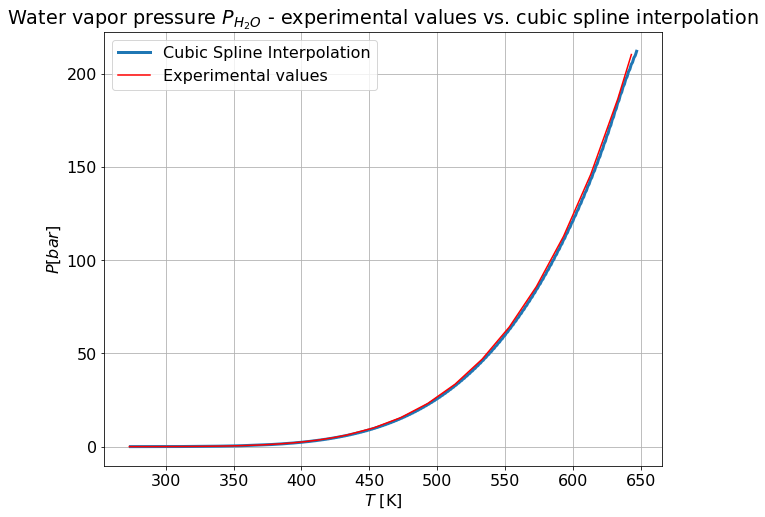

In [22]:
p = np.zeros(len(T)) # create an empty array for the pressure values
for i in range(1, len(T)): # for loop for each of the values in T
    p[i] = simpsonsMethod(dp(Vv_spline(T[0:i]), Vg_spline(T[0:i]), L_spline(T[0:i]), T[0:i]), T[0:i]) # calculate the integral up to the current temprature

# plots the integral up to each temprature
plt.title("Water vapor pressure $P_{H_2O}$ - experimental values vs. cubic spline interpolation")
plt.plot(T, p * 1e-5, label = "Cubic Spline Interpolation", linewidth=3)
plt.plot(experimental_T, experimental_p * 1e-5, label="Experimental values", color = "red")
plt.xlabel(rf"$T$ [K]"); plt.ylabel(rf"$P [bar]$")
plt.legend(); plt.grid(); plt.show()

The interpolation's accuracy is determined by the quality of the input data. The cubic spline interpolation will be affected if there are experimental errors from [3], measurement inaccuracies, or noise in the data. Cubic spline interpolation uses a finite number of data points to generate a function approximation. If the data points are too sparse or not distributed uniformly, the interpolation may fail to accurately capture the true behavior of the pressure integral of water. 

Temperature, impurities, and other environmental conditions can all have an effect on the pressure integral of water. If the function describing the pressure integral is more complex than what a piecewise cubic polynomial can approximate, the cubic spline interpolation will have some small deviations, and that is exactly what we see for higher temperatures. For anything under around $T = 450K$, the interpolation seems to be perfect, and then it is undershooting the pressure by a small amount at higher values.

# Task 2 f)

Now we have all the methods ranging from van Der Waals, numerical methods for Simpsons method, cubic spline interpolation and curve fitting of experimental values. Putting them all together we can finally do a comparison and talk about the differences and the limitations of each method used, and come with a conclusion of what is best.

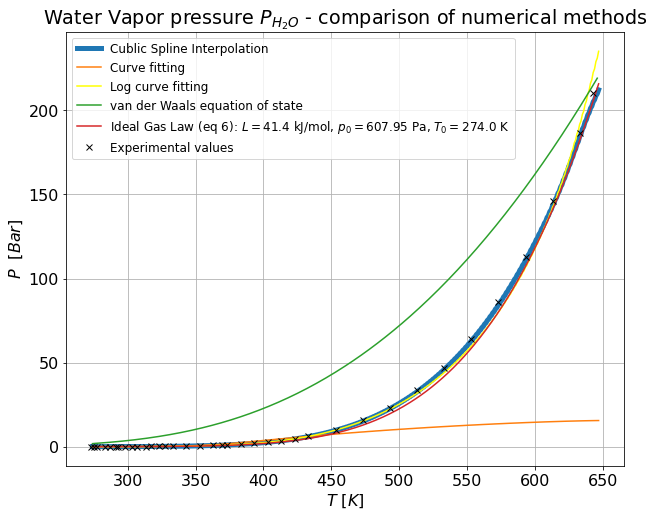

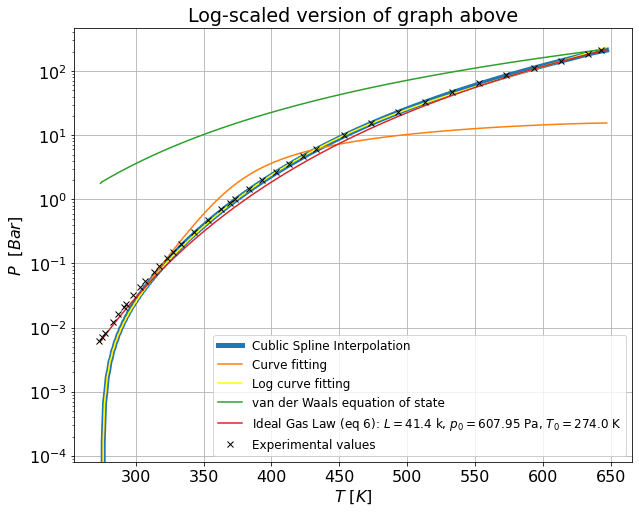

In [23]:
# define the parameters for the funtion
L_0 = 41400 # (J) Joules
p_0 = experimental_p[0]  # (Pa) Pascal
T_0 = T[0] # (K) Kelvin

p_analytical = lambda T: p_0 * np.exp((L_0/R) * ((1 / T_0) - (1 / T))) # define the analytical function 

p_analytical_val = p_analytical(T) # calculate the function for each value of T

# plots the pressure for every method

plt.title("Water Vapor pressure $P_{H_2O}$ - comparison of numerical methods")

plt.plot(T, p * 1e-5, label = "Cublic Spline Interpolation", linewidth=5) # Spline method
plt.plot(T, Pfunctions * 1e-5, label="Curve fitting") # curvefit method
plt.plot(T, Pfunctionslog * 1e-5, label="Log curve fitting", color = "yellow") # log curvefit method
plt.plot(temps, p0 * 1e-5, label="van der Waals equation of state") # van der Waals method
plt.plot(T, p_analytical_val * 1e-5, label=f"Ideal Gas Law (eq 6): $L={L_0 / 1000}$ kJ/mol, $p_0 = {np.round(p_0, 2)}$ Pa, $T_0 = {T_0}$ K", linewidth=1.5) # analytical equation
plt.plot(experimental_T, experimental_p * 1e-5, "x", label="Experimental values", color = "black") # experimental values

plt.xlabel(rf"$T$ $[K]$"); plt.ylabel(rf"$P$  $[Bar]$")
plt.legend(fontsize = 12)
plt.grid();plt.show()

plt.title("Log-scaled version of graph above")

plt.plot(T, p * 1e-5, label = "Cublic Spline Interpolation", linewidth=5) # Spline method
plt.plot(T, Pfunctions * 1e-5, label="Curve fitting") # curvefit method
plt.plot(T, Pfunctionslog * 1e-5, label="Log curve fitting", color = "yellow") # log curvefit method
plt.plot(temps, p0 * 1e-5, label="van der Waals equation of state") # van der Waals method
plt.plot(T, p_analytical_val * 1e-5, label=f"Ideal Gas Law (eq 6): $L={L_0 / 1000}$ k, $p_0 = {np.round(p_0, 2)}$ Pa, $T_0 = {T_0}$ K", linewidth=1.5) # analytical equation
plt.plot(experimental_T, experimental_p * 1e-5, "x", label="Experimental values", color = "black") # experimental values

plt.xlabel(rf"$T$ $[K]$"); plt.ylabel(rf"$P$  $[Bar]$")
plt.yscale("log")
plt.legend(fontsize = 12)
plt.grid(); plt.show()

## Discussion and conclusion

As we can see from the graph above, the cubic spline interpolation and curve fitting follow the trend reasonably well, and so does the ideal gas law at lower temperatures. One outlier from these different methods is van der Waals equation of state. Van der Waals is overshooting what the actual pressure is, even at lower temperatures. The van der Waals equation does not accurately describe phase transitions, such as the liquid-gas phase transition. At low temperatures, real gases like $H_2O$ tend to condense into liquids or solids, which have different properties and behaviors than gases. This is because it does not properly account for these phase transitions, leading to inaccuracies in its predictions. We are between the triple point and critical point temperatures $T_t$ and $T_c$ where water is acting up and is unpredictable for the van der Waals, so from the start it just misleads the curve because of the phase transitions in the triple point $T_t = 0.01^\circ C$.

We have seen that Newton's method both for one variable and its multivariate version does a great job at converging to a solution for non linear equations in a quick fashion. However, it has its limitations and our initial guesses are a huge importance for its convergence. For more difficult tasks than this, initial guesses, singular matrices, more complex equations can be much more of a hassle to deal with. For numerical approximations of analytical expression we experienced deviations from the experimental values. Our way of dealing with this problem was turning over to the experimental data and explicitly performing interpolation and curve fitting. 

An issue we find with the current extracted data points is that we have a lot of data points at lower temperatures, but the temperature intervals are increasing more and more, and we get less data points. This can definitely cause some numerical errors both with the cubic spline interpolation and the curvefitting method we used as they are dependent on amount of data points and their spacing. Using another source than the one we have used to extract data points could have given us better interpolation results.

At the end curve fitting has some inaccuracies for some temperatures in comparison to cubic spline, and was not as precise. However, by doing a more advanced and thorough curve fit through first doing the log of the experimental data, then curvefitting and doing an inverse log, we could find a much better fit. But in the end we can conclude that the best way to match our experimental data was through interpolation, and in this case; cubic spline interpolation. The two methods look almost similiar in the graphs above, but the interpolation matches the experimental data at every point, while the curvefitting does not.

## Bibliography

[1] Støvneng A. J, Aase H. N, Kværnø A. (2023) "TMA4320 vår 2023 - Prosjekt i teknisk fysikk"

[2] Engineering ToolBox, (2005). "Saturated Steam - Properties for Pressure in Bar" https://www.engineeringtoolbox.com/saturated-steam-properties-d_457.html

[3] Engineering ToolBox, (2005). "Water - Saturation Pressure vs. Temperature" https://www.engineeringtoolbox.com/water-vapor-saturation-pressure-d_599.html

[4] Engineering ToolBox, (2005). "Water - Properties at Gas-Liquid Equilibrium Conditions" https://www.engineeringtoolbox.com/water-properties-temperature-equilibrium-pressure-d_2099.html

[5] Engineering ToolBox, (2005). "Water - Heat of Vaporization vs. Temperature" https://www.engineeringtoolbox.com/water-properties-d_1573.html



